In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [12]:
data = pd.read_csv('./../Dataset/DOGE-USD.csv') 
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data.set_index('Date', inplace=True)
data




/var/folders/dr/4hb3w_yn2xq77d2njhl6shph0000gn/T/ipykernel_5562/647318006.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...
2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0


In [17]:
data.isnull().sum()


Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [19]:
data.dropna(inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...
2022-08-30,0.063899,0.064408,0.060550,0.061525,0.061525,328934727.0
2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0


In [20]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [21]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


<Axes: title={'center': 'DOGE Closing Price Over Time'}, xlabel='Date'>

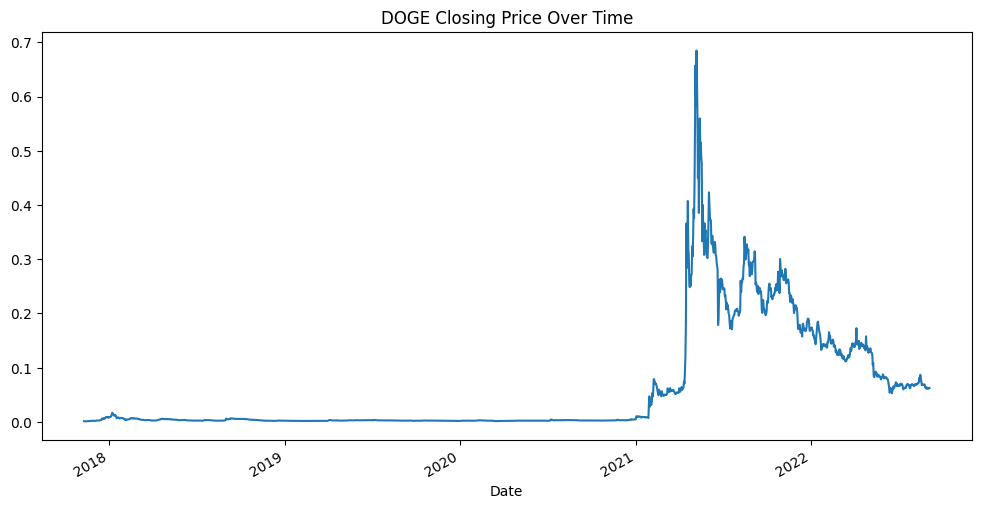

In [22]:
x = data.groupby('Date')['Close'].mean()
x.plot(title='DOGE Closing Price Over Time', figsize=(12, 6))

In [23]:
data['gap'] = data['High'] - data['Low'] * data['Volume']
data['y'] = data['High']/data['Volume']
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
a            0.172057
z            0.063251
y            0.063868
gap          0.604293
Name: Close, dtype: float64

In [24]:
data = data[["Close", "Volume", "gap", "a", "b"]]
data.head()

,Close,Volume,gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,-7392.527135,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,-4777.333569,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,-2545.661023,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,-3295.536710,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,-2528.412918,1.189401,2.951226e+06


In [25]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)

(11, 5) (19, 5)


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model = SARIMAX(endog=train["Close"], exog=train.drop(
    "Close", axis=1), order=(2, 1, 1))
results = model.fit()
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  42.631
Date:                Mon, 25 Aug 2025   AIC                            -69.261
Time:                        21:46:35   BIC                            -66.840
Sample:                    08-05-2022   HQIC                           -71.917
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume     -1.246e-10   1.12e-11    -11.165      0.000   -1.46e-10   -1.03e-10
gap        -6.459e-10   1.44e-10     -4.487      0.000   -9.28e-10   -3.64e-10
a             -0.0273   2.88e-14  -9.49e+11      0.0

/Users/olixstudios/Documents/workspace/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/olixstudios/Documents/workspace/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/olixstudios/Documents/workspace/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/olixstudios/Documents/workspace/venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/olixstudios/Documents/workspace/venv/lib/python3.13/s

In [29]:
start = 11
end = 29
predictions = results.predict(
    start=start,
    end=end,
    exog=test.drop("Close", axis=1))
predictions

2022-08-16    0.090288
2022-08-17    0.080904
2022-08-18    0.075953
2022-08-19    0.073412
2022-08-20    0.072582
2022-08-21    0.073065
2022-08-22    0.072362
2022-08-23    0.073368
2022-08-24    0.073322
2022-08-25    0.072955
2022-08-26    0.071262
2022-08-27    0.071958
2022-08-28    0.072513
2022-08-29    0.072210
2022-08-30    0.071878
2022-08-31    0.072253
2022-09-01    0.071889
2022-09-02    0.072636
2022-09-03    0.072878
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

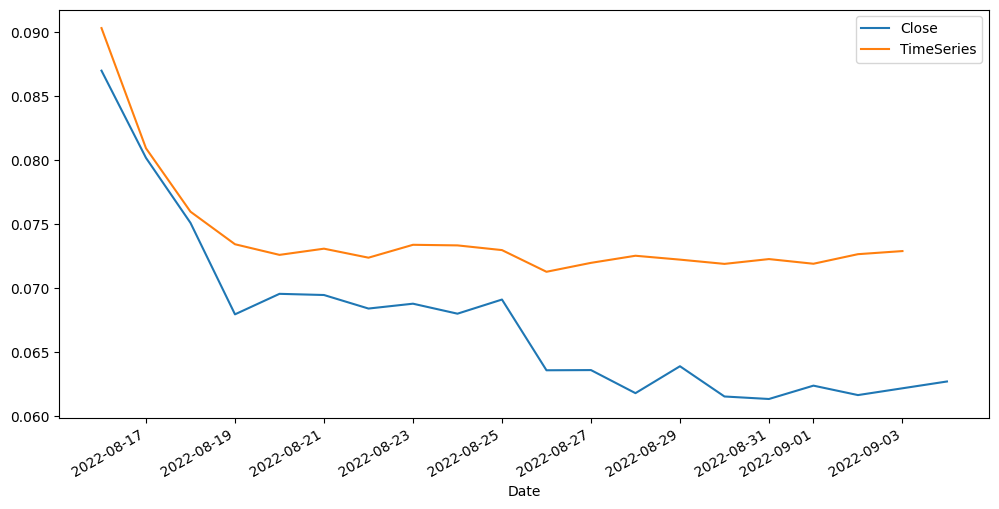

In [30]:
test["Close"].plot(legend=True, figsize=(12, 6))
predictions.plot(label='TimeSeries', legend=True)